In [4]:
# -*- coding: utf-8 -*-
"""Untitled1.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Tfb5FeYvIjm9HsQOwbqKIRVGxFZeONLU
"""

import pandas as pd
import numpy as np
import re
import string

df = pd.read_csv('dataset_KampusMengajar 1000.csv')



# Hapus kolom yang tidak diperlukan
df.drop(df.columns[[0,4,5,6,7,9,10,11,12,13]], axis=1, inplace=True)


# Hapus baris kosong
# df.dropna(inplace=True)


# Ubah format tanggal dan waktu
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.dropna(subset=['created_at'], inplace=True)
df['created_at'] = df['created_at'].dt.strftime('%d-%m-%Y')


from os import remove
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_special_characters(text):
    return re.sub(r'#[^a-zA-Z0-9\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_hashtags_mentions(text):
    return re.sub(r'[@#]\w+', '', text)

def remove_special(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def to_lowercase(text):
    return text.lower()

#Remove duplicates
def remove_duplicates(df):
    df.drop_duplicates(subset=['full_text'], inplace=True)
    return df


def clean_text(text):
    if isinstance(text, str):
        text = remove_urls(text)
        text = remove_special_characters(text)
        text = remove_hashtags_mentions(text)
        text = remove_special(text)
        text = remove_numbers(text)
        text = to_lowercase(text)
        text = remove_extra_whitespace(text)
        text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['Cleaned_FullText'] = df['full_text'].apply(clean_text)
df['Cleaned_Location'] = df['location'].apply(clean_text)
df = remove_duplicates(df)
display(df)

df.to_excel('cleaning_file_hasil_copy2.xlsx', index=False)
# files.download('cleaning_file_hasil.xlsx')

C:\Users\Windows\AppData\Local\Temp\ipykernel_34596\2782771322.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


,created_at,favorite_count,full_text,location,username,Cleaned_FullText,Cleaned_Location
0,14-05-2024,0,@clematisserie Hooh aku ikut kampus mengajar j...,"He/him, Ar 58",lastferdict,hooh aku ikut kampus mengajar jadi guru,hehim ar
1,14-05-2024,0,Kalah karo jamanku kampus mengajar (yg didapet...,chiang mai,nanamislutty,kalah karo jamanku kampus mengajar yg didapeti...,chiang mai
2,14-05-2024,1,Anjing semuanya anjing Kampus mengajar anjing,NaN,sigitirtoaji,anjing semuanya anjing kampus mengajar anjing,NaN
3,14-05-2024,0,Ikut kampus mengajar adalah urutan pertama pen...,NaN,sigitirtoaji,ikut kampus mengajar adalah urutan pertama pen...,NaN
4,13-05-2024,5,haloo ada anak fmipa UNY... sem 4 yg mau dafta...,NaN,UNY_Base,haloo ada anak fmipa uny sem yg mau daftar kam...,NaN
...,...,...,...,...,...,...,...
1003,27-02-2024,0,@tatanwonuuu salfok belakang ikut kampus menga...,Caratland,heartrobbrs,salfok belakang ikut kampus mengajar kamu tan,caratland
1004,27-02-2024,0,Dulu pengen ikut kampus mengajar tapi udah mah...,Bumi 🌏,elfhhhhhhh,dulu pengen ikut kampus mengajar tapi udah mah...,bumi
1005,27-02-2024,1,Day 1 Kampus Mengajar https://t.co/RBsqnqs0Dn,Special Region of Yogyakarta,itsnabilx,day kampus mengajar,special region of yogyakarta
1006,27-02-2024,10,@collegemenfess Minimal ikut ukm atau ikut msi...,NaN,anna_jeonwonu,minimal ikut ukm atau ikut msib kampus mengaja...,NaN


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [3]:
#NLTK

nltk.download('stopwords')
stemmer = StemmerFactory().create_stemmer()
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def remove_stopwords(text):
    if isinstance(text, str):
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        return ' '.join(filtered_sentence)
    return text

df['Cleaned_FullText'] = df['Cleaned_FullText'].apply(remove_stopwords)
df

,created_at,favorite_count,full_text,location,username,Cleaned_FullText,Cleaned_Location
0,14-05-2024,0,@clematisserie Hooh aku ikut kampus mengajar j...,"He/him, Ar 58",lastferdict,hooh kampus mengajar guru,hehim ar
1,14-05-2024,0,Kalah karo jamanku kampus mengajar (yg didapet...,chiang mai,nanamislutty,kalah karo jamanku kampus mengajar yg didapeti...,chiang mai
2,14-05-2024,1,Anjing semuanya anjing Kampus mengajar anjing,NaN,sigitirtoaji,anjing anjing kampus mengajar anjing,NaN
3,14-05-2024,0,Ikut kampus mengajar adalah urutan pertama pen...,NaN,sigitirtoaji,kampus mengajar urutan penyesalan,NaN
4,13-05-2024,5,haloo ada anak fmipa UNY... sem 4 yg mau dafta...,NaN,UNY_Base,haloo anak fmipa uny sem yg daftar kampus meng...,NaN
...,...,...,...,...,...,...,...
1003,27-02-2024,0,@tatanwonuuu salfok belakang ikut kampus menga...,Caratland,heartrobbrs,salfok kampus mengajar tan,caratland
1004,27-02-2024,0,Dulu pengen ikut kampus mengajar tapi udah mah...,Bumi 🌏,elfhhhhhhh,pengen kampus mengajar udah mahasiswa skrg sek...,bumi
1005,27-02-2024,1,Day 1 Kampus Mengajar https://t.co/RBsqnqs0Dn,Special Region of Yogyakarta,itsnabilx,day kampus mengajar,special region of yogyakarta
1006,27-02-2024,10,@collegemenfess Minimal ikut ukm atau ikut msi...,NaN,anna_jeonwonu,minimal ukm msib kampus mengajar isma org yg k...,NaN


In [5]:
#Stemming
def stemming(text):
    text = text.split()
    stemmed = []
    for word in text:
        if(word == 'kampus' or word == 'mengajar'):
            stemmed.append(word)
        else:
            stemmed.append(stemmer.stem(word))
        
    return ' '.join(stemmed)

df['Cleaned_FullText'] = df['Cleaned_FullText'].apply(stemming)
df

,created_at,favorite_count,full_text,location,username,Cleaned_FullText,Cleaned_Location
0,14-05-2024,0,@clematisserie Hooh aku ikut kampus mengajar j...,"He/him, Ar 58",lastferdict,hooh kampus mengajar guru,hehim ar
1,14-05-2024,0,Kalah karo jamanku kampus mengajar (yg didapet...,chiang mai,nanamislutty,kalah karo jaman kampus mengajar yg didapetin ...,chiang mai
2,14-05-2024,1,Anjing semuanya anjing Kampus mengajar anjing,NaN,sigitirtoaji,anjing anjing kampus mengajar anjing,NaN
3,14-05-2024,0,Ikut kampus mengajar adalah urutan pertama pen...,NaN,sigitirtoaji,kampus mengajar urut sesal,NaN
4,13-05-2024,5,haloo ada anak fmipa UNY... sem 4 yg mau dafta...,NaN,UNY_Base,haloo anak fmipa uny sem yg daftar kampus meng...,NaN
...,...,...,...,...,...,...,...
1003,27-02-2024,0,@tatanwonuuu salfok belakang ikut kampus menga...,Caratland,heartrobbrs,salfok kampus mengajar tan,caratland
1004,27-02-2024,0,Dulu pengen ikut kampus mengajar tapi udah mah...,Bumi 🌏,elfhhhhhhh,ken kampus mengajar udah mahasiswa skrg sekola...,bumi
1005,27-02-2024,1,Day 1 Kampus Mengajar https://t.co/RBsqnqs0Dn,Special Region of Yogyakarta,itsnabilx,day kampus mengajar,special region of yogyakarta
1006,27-02-2024,10,@collegemenfess Minimal ikut ukm atau ikut msi...,NaN,anna_jeonwonu,minimal ukm msib kampus mengajar isma org yg b...,NaN


In [6]:
#Tokenizing 

def tokenizing(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return text

df['Tokenized_FullText'] = df['Cleaned_FullText'].apply(tokenizing)
df

,created_at,favorite_count,full_text,location,username,Cleaned_FullText,Cleaned_Location,Tokenized_FullText
0,14-05-2024,0,@clematisserie Hooh aku ikut kampus mengajar j...,"He/him, Ar 58",lastferdict,hooh kampus mengajar guru,hehim ar,"[hooh, kampus, mengajar, guru]"
1,14-05-2024,0,Kalah karo jamanku kampus mengajar (yg didapet...,chiang mai,nanamislutty,kalah karo jaman kampus mengajar yg didapetin ...,chiang mai,"[kalah, karo, jaman, kampus, mengajar, yg, did..."
2,14-05-2024,1,Anjing semuanya anjing Kampus mengajar anjing,NaN,sigitirtoaji,anjing anjing kampus mengajar anjing,NaN,"[anjing, anjing, kampus, mengajar, anjing]"
3,14-05-2024,0,Ikut kampus mengajar adalah urutan pertama pen...,NaN,sigitirtoaji,kampus mengajar urut sesal,NaN,"[kampus, mengajar, urut, sesal]"
4,13-05-2024,5,haloo ada anak fmipa UNY... sem 4 yg mau dafta...,NaN,UNY_Base,haloo anak fmipa uny sem yg daftar kampus meng...,NaN,"[haloo, anak, fmipa, uny, sem, yg, daftar, kam..."
...,...,...,...,...,...,...,...,...
1003,27-02-2024,0,@tatanwonuuu salfok belakang ikut kampus menga...,Caratland,heartrobbrs,salfok kampus mengajar tan,caratland,"[salfok, kampus, mengajar, tan]"
1004,27-02-2024,0,Dulu pengen ikut kampus mengajar tapi udah mah...,Bumi 🌏,elfhhhhhhh,ken kampus mengajar udah mahasiswa skrg sekola...,bumi,"[ken, kampus, mengajar, udah, mahasiswa, skrg,..."
1005,27-02-2024,1,Day 1 Kampus Mengajar https://t.co/RBsqnqs0Dn,Special Region of Yogyakarta,itsnabilx,day kampus mengajar,special region of yogyakarta,"[day, kampus, mengajar]"
1006,27-02-2024,10,@collegemenfess Minimal ikut ukm atau ikut msi...,NaN,anna_jeonwonu,minimal ukm msib kampus mengajar isma org yg b...,NaN,"[minimal, ukm, msib, kampus, mengajar, isma, o..."


In [13]:
#Lexicon polarityy
from pathlib import Path
import csv
DDIR = Path().parent
lexicon_positive = dict()
with open(f'{DDIR}/InSet-master/positive.csv','r') as file:
    reader = csv.reader(file, delimiter=',')
    display(reader)
    for row in reader:
        #if not a number
        if(not row[1].isdigit()):
            continue
        lexicon_positive[row[0]] = int(row[1])
    file.close()
        
lexicon_negative = dict()
with open(f'{DDIR}/InSet-master/negative.csv','r') as file:
    reader2 = csv.reader(file, delimiter=',')
    cek = True
    for row in reader2:
        if cek:
            cek = False
            continue
        # if(not row[1].isdigit()):
        #     continue
        lexicon_negative[row[0]] = int(row[1])
    file.close()

        
def sentiment_analysis(text):
    #for word in text
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    polarity = 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
    return score,polarity


In [8]:
lexicon_positive

{'hai': 3,
 'merekam': 2,
 'ekstensif': 3,
 'paripurna': 1,
 'detail': 2,
 'pernik': 3,
 'belas': 2,
 'welas': 4,
 'kabung': 1,
 'rahayu': 4,
 'maaf': 2,
 'hello': 2,
 'promo': 3,
 'terimakasih': 5,
 'cover': 3,
 'mohon': 2,
 'mengawal': 2,
 'statistik': 1,
 'keluangan': 3,
 'jalan terbuka': 3,
 'banyaknya': 3,
 'lebar': 3,
 'bentang': 1,
 'hendaknya': 1,
 'silahkan': 3,
 'semboyan': 2,
 'ditunggu': 2,
 'akses': 2,
 'penerangan': 2,
 'hi': 1,
 'dibantu': 2,
 'makasih': 4,
 'halo': 1,
 'thanks': 3,
 'pengembangan': 3,
 'diva': 2,
 'punya': 3,
 'tidak segan': 2,
 'detailnya': 1,
 'tak segan': 2,
 'aktivasi': 2,
 'asih': 3,
 'kasih sayang': 5,
 'kekaguman': 4,
 'kehangatan': 4,
 'afeksi': 2,
 'renjana': 2,
 'amor': 2,
 'cinta kasih': 5,
 'tresna': 2,
 'filantropi': 2,
 'cintrong': 2,
 'suasana (hati)': 1,
 'dinamika': 3,
 'tuhan': 3,
 'merespon': 3,
 'makmur': 4,
 'suka cita': 4,
 'pengguna': 1,
 'tunggu': 1,
 'lotre': 2,
 'nggak': 1,
 'kupon': 3,
 'terpelihara': 4,
 'terawat': 5,
 'tersa

In [9]:
results = df['Tokenized_FullText'].apply(sentiment_analysis)
df['Score'] = [result[0] for result in results]
df['Polarity'] = [result[1] for result in results]
print(df['Polarity'].value_counts())
df

Polarity
Negative    489
Positive    368
Neutral     149
Name: count, dtype: int64


,created_at,favorite_count,full_text,location,username,Cleaned_FullText,Cleaned_Location,Tokenized_FullText,Score,Polarity
0,14-05-2024,0,@clematisserie Hooh aku ikut kampus mengajar j...,"He/him, Ar 58",lastferdict,hooh kampus mengajar guru,hehim ar,"[hooh, kampus, mengajar, guru]",3,Positive
1,14-05-2024,0,Kalah karo jamanku kampus mengajar (yg didapet...,chiang mai,nanamislutty,kalah karo jaman kampus mengajar yg didapetin ...,chiang mai,"[kalah, karo, jaman, kampus, mengajar, yg, did...",13,Positive
2,14-05-2024,1,Anjing semuanya anjing Kampus mengajar anjing,NaN,sigitirtoaji,anjing anjing kampus mengajar anjing,NaN,"[anjing, anjing, kampus, mengajar, anjing]",-12,Negative
3,14-05-2024,0,Ikut kampus mengajar adalah urutan pertama pen...,NaN,sigitirtoaji,kampus mengajar urut sesal,NaN,"[kampus, mengajar, urut, sesal]",-3,Negative
4,13-05-2024,5,haloo ada anak fmipa UNY... sem 4 yg mau dafta...,NaN,UNY_Base,haloo anak fmipa uny sem yg daftar kampus meng...,NaN,"[haloo, anak, fmipa, uny, sem, yg, daftar, kam...",4,Positive
...,...,...,...,...,...,...,...,...,...,...
1003,27-02-2024,0,@tatanwonuuu salfok belakang ikut kampus menga...,Caratland,heartrobbrs,salfok kampus mengajar tan,caratland,"[salfok, kampus, mengajar, tan]",0,Neutral
1004,27-02-2024,0,Dulu pengen ikut kampus mengajar tapi udah mah...,Bumi 🌏,elfhhhhhhh,ken kampus mengajar udah mahasiswa skrg sekola...,bumi,"[ken, kampus, mengajar, udah, mahasiswa, skrg,...",1,Positive
1005,27-02-2024,1,Day 1 Kampus Mengajar https://t.co/RBsqnqs0Dn,Special Region of Yogyakarta,itsnabilx,day kampus mengajar,special region of yogyakarta,"[day, kampus, mengajar]",0,Neutral
1006,27-02-2024,10,@collegemenfess Minimal ikut ukm atau ikut msi...,NaN,anna_jeonwonu,minimal ukm msib kampus mengajar isma org yg b...,NaN,"[minimal, ukm, msib, kampus, mengajar, isma, o...",0,Neutral


In [10]:
df.to_excel('cleaning_file_hasil_copy4.xlsx', index=False)

In [11]:
#Descending score
clean_df = df[['full_text', 'Tokenized_FullText', 'Score', 'Polarity']]
asc_score_df = clean_df.sort_values(by='Score', ascending=False)
asc_score_df 

,full_text,Tokenized_FullText,Score,Polarity
657,[Cm] jd sender pas ikut kampus mengajar itu fu...,"[cm, jd, sender, pas, kampus, mengajar, full, ...",27,Positive
278,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"[naah, genx, lulus, kampus, plat, merah, jadul...",22,Positive
176,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"[alhamdulillah, hdup, sederhana, dr, dl, gada,...",21,Positive
266,@luce9stellare masalahnya itu guru nya kurang ...,"[guru, nya, daerah, kampus, mengajar, aja, gur...",20,Positive
464,Kampus mengajar itu capek banget asli apalagi ...,"[kampus, mengajar, capek, banget, asli, dapet,...",19,Positive
...,...,...,...,...
906,@txtdrbekasi Jangan sok cerdas kayak anies? la...,"[sok, cerdas, kayak, anies, anies, emg, cerdas...",-25,Negative
224,Aku yang prospeknya guru SMA/K ini jg akhirnya...,"[prospek, guru, smak, jg, alam, ngajar, anak, ...",-25,Negative
584,Nyesel gua ikut Kampus Mengajar mending ikut m...,"[nyesel, gua, kampus, mengajar, mending, magan...",-27,Negative
307,dah greget punya satu anggota kampus mengajar ...,"[dah, greget, anggota, kampus, mengajar, nggak...",-28,Negative


In [12]:
asc_score_df.to_excel('clean_df2.xlsx', index=False)

In [13]:
clean_df

,full_text,Tokenized_FullText,Score,Polarity
0,@clematisserie Hooh aku ikut kampus mengajar j...,"[hooh, kampus, mengajar, guru]",3,Positive
1,Kalah karo jamanku kampus mengajar (yg didapet...,"[kalah, karo, jaman, kampus, mengajar, yg, did...",13,Positive
2,Anjing semuanya anjing Kampus mengajar anjing,"[anjing, anjing, kampus, mengajar, anjing]",-12,Negative
3,Ikut kampus mengajar adalah urutan pertama pen...,"[kampus, mengajar, urut, sesal]",-3,Negative
4,haloo ada anak fmipa UNY... sem 4 yg mau dafta...,"[haloo, anak, fmipa, uny, sem, yg, daftar, kam...",4,Positive
...,...,...,...,...
1003,@tatanwonuuu salfok belakang ikut kampus menga...,"[salfok, kampus, mengajar, tan]",0,Neutral
1004,Dulu pengen ikut kampus mengajar tapi udah mah...,"[ken, kampus, mengajar, udah, mahasiswa, skrg,...",1,Positive
1005,Day 1 Kampus Mengajar https://t.co/RBsqnqs0Dn,"[day, kampus, mengajar]",0,Neutral
1006,@collegemenfess Minimal ikut ukm atau ikut msi...,"[minimal, ukm, msib, kampus, mengajar, isma, o...",0,Neutral


In [14]:
#negative tweets
negative_df = clean_df.sort_values(by='Score', ascending=True)
negative_df[:10]

,full_text,Tokenized_FullText,Score,Polarity
604,@collegemenfess Aku ikut kampus mengajar seru ...,"[kampus, mengajar, seru, tua, anak, anak, beda...",-32,Negative
307,dah greget punya satu anggota kampus mengajar ...,"[dah, greget, anggota, kampus, mengajar, nggak...",-28,Negative
584,Nyesel gua ikut Kampus Mengajar mending ikut m...,"[nyesel, gua, kampus, mengajar, mending, magan...",-27,Negative
224,Aku yang prospeknya guru SMA/K ini jg akhirnya...,"[prospek, guru, smak, jg, alam, ngajar, anak, ...",-25,Negative
906,@txtdrbekasi Jangan sok cerdas kayak anies? la...,"[sok, cerdas, kayak, anies, anies, emg, cerdas...",-25,Negative
387,WKWKWKWKW emang program tai. Dari awal udah ka...,"[wkwkwkwkw, emang, program, tai, udah, kayak, ...",-23,Negative
888,Sekarang sedang marak tagar #janganjadidosen t...,"[marak, tagar, profesi, dosen, rusak, bumi, ru...",-21,Negative
535,non beasiswa bayar ukt mengharapkan dari bbh :...,"[non, beasiswa, bayar, ukt, harap, bbh, kalo, ...",-20,Negative
624,@collegemenfess Aku ikutan kampus mengajar si ...,"[ikut, kampus, mengajar, si, seruuu, ngajar, a...",-20,Negative
238,@convomf Ditolak kampus mengajar ditolak kerja...,"[tolak, kampus, mengajar, tolak, kerja, tolak,...",-19,Negative


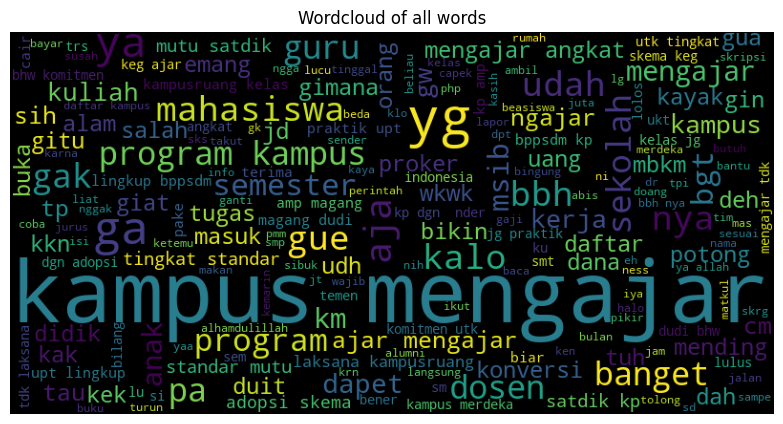

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


#Making wordcloud
all_words = ''
for text in clean_df['Tokenized_FullText']:
    for words in text:
        all_words += ' ' + words
        
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wordcloud of all words')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [17]:
#Positive or Negative word clouds

def words_sentiment(text):
    positive_words = []
    negative_words = []
    for word in text:
        score_positive = 0
        score_negative = 0
        if word in lexicon_positive:
            score_positive += lexicon_positive[word]
        if word in lexicon_negative:
            score_negative += lexicon_negative[word]
        
        if(score_positive + score_negative) > 0:
            positive_words.append(word)
        else:
            negative_words.append(word)
    return positive_words, negative_words


In [17]:
sentiment = clean_df['Tokenized_FullText'].apply(words_sentiment)
sentiment

0                      ([guru], [hooh, kampus, mengajar])
1       ([sekolah, aja, dapet, juta, ya, allah, kerja]...
2        ([], [anjing, anjing, kampus, mengajar, anjing])
3                   ([], [kampus, mengajar, urut, sesal])
4       ([haloo, ya, sharing, aja], [anak, fmipa, uny,...
                              ...                        
1003                ([], [salfok, kampus, mengajar, tan])
1004    ([ken, sekolah], [kampus, mengajar, udah, maha...
1005                        ([], [day, kampus, mengajar])
1006    ([karya, lulus], [minimal, ukm, msib, kampus, ...
1007    ([hutan, kerja], [kampus, mengajar, semester, ...
Name: Tokenized_FullText, Length: 1006, dtype: object

In [18]:
zipped_sentiment = list(zip(*sentiment))
zipped_sentiment

[(['guru'],
  ['sekolah', 'aja', 'dapet', 'juta', 'ya', 'allah', 'kerja'],
  [],
  [],
  ['haloo', 'ya', 'sharing', 'aja'],
  ['gampang', 'terima'],
  ['angkat'],
  [],
  [],
  ['sibuk', 'banget', 'lulus'],
  ['terima', 'umum'],
  ['umum', 'terima', 'terima', 'otomatis'],
  [],
  ['bismillah', 'terima'],
  [],
  ['banget', 'organisasi', 'pas'],
  ['mama'],
  [],
  ['ya'],
  ['pas', 'umi', 'hasil', 'kerja', 'hasil'],
  ['hasil', 'enak'],
  [],
  ['halo', 'reply', 'ya'],
  [],
  [],
  ['rekognisi', 'coba', 'aja'],
  [],
  [],
  [],
  ['pas', 'guru', 'sekolah', 'ya'],
  [],
  ['pas', 'dapet'],
  ['alam', 'pas'],
  ['angkat', 'hallo', 'angkat'],
  ['sabar', 'aja', 'nilai'],
  ['ketemu', 'kembang', 'suka', 'tolong', 'banget', 'aja'],
  ['banget', 'studi', 'sastra'],
  [],
  [],
  [],
  ['muslim'],
  ['islam', 'presiden'],
  ['moga', 'tambah', 'kembang'],
  ['sukses', 'gelar'],
  ['ya', 'konsultasi'],
  [],
  ['halo', 'lihat', 'ya'],
  [],
  [],
  ['ken', 'kelar'],
  ['ya'],
  [],
  [],
  ['

In [19]:
positive_words = zipped_sentiment[0]
negative_words = zipped_sentiment[1]

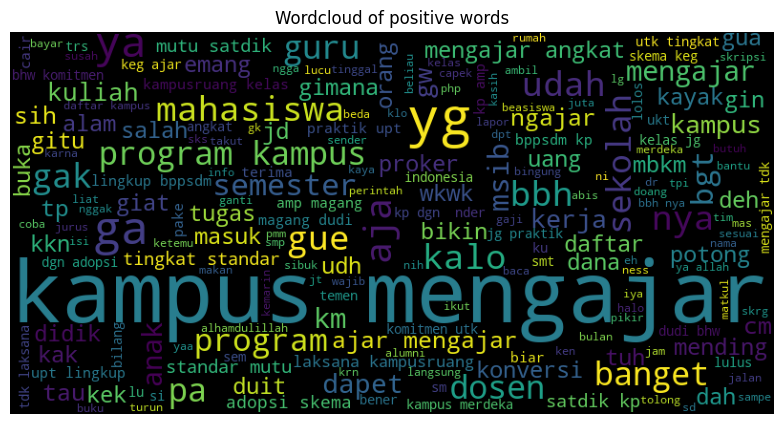

In [20]:
#Positive wordcloud
all_positive_words = ''
for text in positive_words:
    for words in text:
        all_positive_words += ' ' + words
        
wordcloud_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_positive_words)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wordcloud of positive words')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

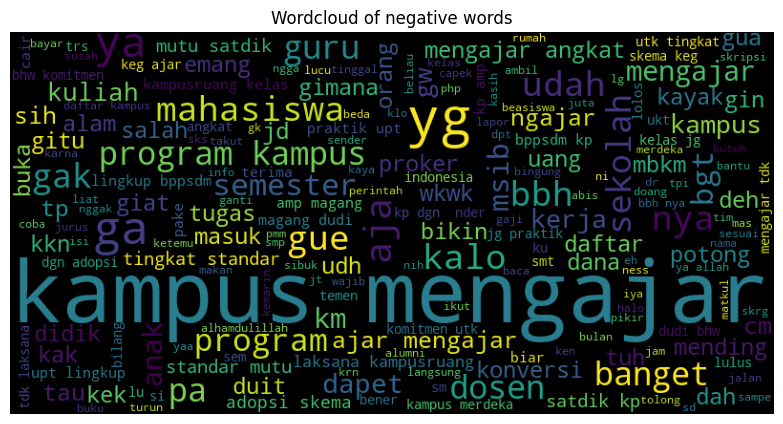

In [21]:
#Negative wordcloud
all_negative_words = ''
for text in negative_words:
    for words in text:
        all_negative_words += ' ' + words

wordcloud_negative = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_negative_words)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wordcloud of negative words')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

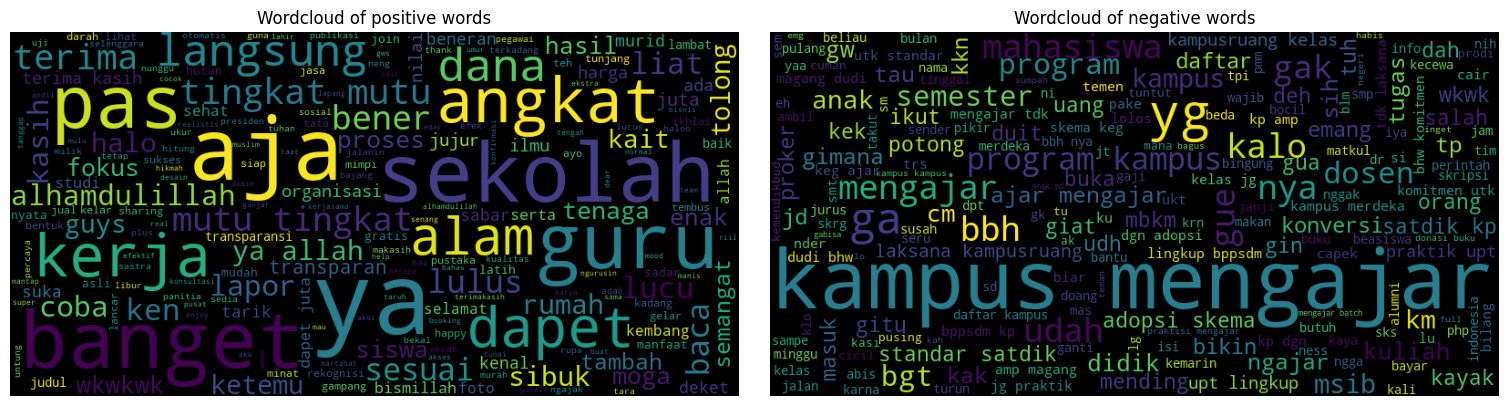

In [22]:
#Perbandingan Positive dan Negative
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].set_title('Wordcloud of positive words')
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
ax[0].axis('off')
fig.tight_layout(pad=0)
ax[1].set_title('Wordcloud of negative words')
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
ax[1].axis('off')
plt.show()

In [5]:
#Gabungin hasil cleaning dan sentiment analysis

df1_500 = pd.read_excel('clean_df1_reviewed.xlsx')
df501_1000 = pd.read_excel('clean_df1_reviewed_500_1000.xlsx')

In [6]:
#Removedlist
with open('removed_list.txt', 'r') as file:
    removed_list = file.read().splitlines()
    file.close()
    
removed_list


['117',
 '119',
 '120',
 '121',
 '122',
 '123',
 '125',
 '126',
 '129',
 '140',
 '141',
 '143',
 '148',
 '152',
 '153',
 '155',
 '157',
 '162',
 '169',
 '176',
 '183',
 '187',
 '191',
 '192',
 '196',
 '197',
 '204',
 '206',
 '207',
 '210',
 '213',
 '214',
 '217',
 '218',
 '222',
 '229',
 '230',
 '232',
 '238',
 '239',
 '242',
 '243',
 '247',
 '250',
 '253',
 '259',
 '263',
 '265',
 '268',
 '270',
 '275',
 '288',
 '289',
 '297',
 '299',
 '302',
 '306',
 '307',
 '309',
 '313',
 '314',
 '320',
 '324',
 '325',
 '326',
 '337',
 '338',
 '339',
 '346',
 '353',
 '354',
 '355',
 '356',
 '360',
 '362',
 '363',
 '366',
 '367',
 '369',
 '372',
 '377',
 '381',
 '382',
 '386',
 '388',
 '400',
 '401',
 '419',
 '420',
 '421',
 '422',
 '432',
 '433',
 '435',
 '441',
 '444',
 '452',
 '454',
 '459',
 '465',
 '466',
 '483',
 '856',
 '841',
 '839',
 '838',
 '836',
 '827',
 '822',
 '816',
 '815',
 '789',
 '783',
 '775',
 '764',
 '739',
 '725',
 '720',
 '717',
 '706',
 '696',
 '687',
 '686',
 '682',
 '662',


In [25]:
df1_500.head()

,full_text,Tokenized_FullText,Score,Polarity,Review
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",46,Positive,1
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",40,Neutral,1
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",37,Neutral,1
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",34,Negative,1
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",33,Negative,1


In [7]:
df1_500[:501]

,full_text,Tokenized_FullText,Score,Polarity,Review
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",46,Positive,1
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",40,Neutral,1
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",37,Neutral,1
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",34,Negative,1
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",33,Negative,1
...,...,...,...,...,...
496,SIAPAPUN YG BACA INI ADIK ADIK TINGKATKU TOLON...,"['yg', 'baca', 'adik', 'adik', 'tingkat', 'tol...",7,Positive,0
497,@Araawork @collegemenfess Bukannya dicover mel...,"['dicover', 'aplikasi', 'jkn', 'mobile', 'ya',...",7,Positive,0
498,@banyaklukanyaa @englishfess_ dulu iyaa kak ta...,"['iyaa', 'kak', 'alam', 'ku', 'kemaren', 'kamp...",7,Positive,0
499,Kampus Mengajar sebagai Upaya Peningkatan Kema...,"['kampus', 'mengajar', 'upaya', 'tingkat', 'ma...",7,Positive,0


In [27]:
df501_1000.head()

,full_text,Tokenized_FullText,Score,Polarity,Review
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",46,Positive,1
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",40,Neutral,1
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",37,Neutral,1
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",34,Negative,1
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",33,Negative,1


In [8]:
dfnew = pd.concat([df1_500[:501], df501_1000[501:]], ignore_index=True)
dfnew

,full_text,Tokenized_FullText,Score,Polarity,Review
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",46,Positive,1
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",40,Neutral,1
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",37,Neutral,1
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",34,Negative,1
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",33,Negative,1
...,...,...,...,...,...
1001,kampus menipu bkn kampus mengajar,"['kampus', 'tipu', 'bkn', 'kampus', 'mengajar']",0,Negative,1
1002,@tanyarlfes nanya tentang kampus mengajar,"['nanya', 'kampus', 'mengajar']",0,Neutral,1
1003,Ga expect kampus mengajar life serumit ini,"['ga', 'expect', 'kampus', 'mengajar', 'life',...",0,Negative,1
1004,ikut kampus mengajar karena gak segutluking ti...,"['kampus', 'mengajar', 'gak', 'segutluking', '...",0,Positive,1


In [9]:
removed_indices = [int(index) for index in removed_list]
dfnew = dfnew.drop(dfnew.index[removed_indices])

In [10]:
dfnew = dfnew.reset_index(drop=True)
dfnew = dfnew[['full_text', 'Tokenized_FullText']]

In [11]:
def sentiment_analysis2(text):
    #for word in text
    text = text.replace('[','').replace(']','').replace("'",'').split(', ')
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    polarity = 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
    return score,polarity

In [14]:
result_dfnew = dfnew['Tokenized_FullText'].apply(sentiment_analysis2)

dfnew['Score'] = [result[0] for result in result_dfnew]
dfnew['Polarity'] = [result[1] for result in result_dfnew]
print(dfnew['Polarity'].value_counts())
dfnew

Polarity
Negative    385
Positive    315
Neutral     138
Name: count, dtype: int64


,full_text,Tokenized_FullText,Score,Polarity
0,@d_youngmart @Strategi_Bisnis Naah.... saya Ge...,"['naah', 'genx', 'lulus', 'kampus', 'plat', 'm...",22,Positive
1,@eexxoo_7 alhamdulillah hdup sederhana dr dl g...,"['alhamdulillah', 'hdup', 'sederhana', 'dr', '...",21,Positive
2,[Cm] jd sender pas ikut kampus mengajar itu fu...,"['cm', 'jd', 'sender', 'pas', 'kampus', 'menga...",27,Positive
3,Kampus mengajar itu capek banget asli apalagi ...,"['kampus', 'mengajar', 'capek', 'banget', 'asl...",19,Positive
4,MEMBANTU BAIK ITU PEMINJAMAN FASILITAS SEKOLAH...,"['bantu', 'pinjam', 'fasilitas', 'sekolah', 'b...",5,Positive
...,...,...,...,...
833,kampus menipu bkn kampus mengajar,"['kampus', 'tipu', 'bkn', 'kampus', 'mengajar']",0,Neutral
834,@tanyarlfes nanya tentang kampus mengajar,"['nanya', 'kampus', 'mengajar']",-1,Negative
835,Ga expect kampus mengajar life serumit ini,"['ga', 'expect', 'kampus', 'mengajar', 'life',...",-7,Negative
836,ikut kampus mengajar karena gak segutluking ti...,"['kampus', 'mengajar', 'gak', 'segutluking', '...",-4,Negative


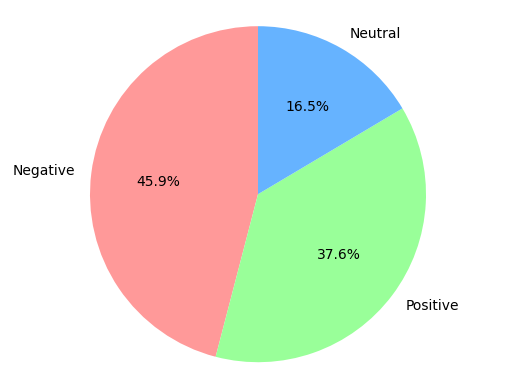

In [33]:
#Donut chart perbandingan polarity
fig, ax = plt.subplots()
ax.pie(dfnew['Polarity'].value_counts(), labels=dfnew['Polarity'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#99ff99','#66b3ff'])
ax.axis('equal')
plt.show()


In [15]:
all_text = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ')
all_text[0]

['naah',
 'genx',
 'lulus',
 'kampus',
 'plat',
 'merah',
 'jadul',
 'ipk',
 'bawah',
 'yg',
 'lulus',
 'atas',
 'hitung',
 'jari',
 'dosen',
 'legend',
 'yg',
 'killer',
 'bugar',
 'prima',
 'dlm',
 'mengajar',
 'mati',
 'kutu',
 'cuci',
 'otak',
 'kuliah',
 'dgn',
 'beliau',
 'lulus',
 'nilai',
 'b',
 'c',
 'udh',
 'alhamdulillah']

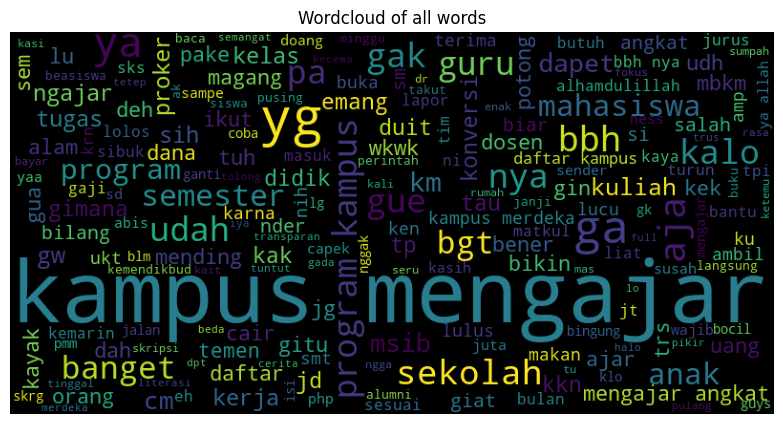

In [35]:
#see positive and negative words

#Making wordcloud
all_words = ''

for text in all_text:
    for words in text:
        all_words += ' ' + words
        
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wordcloud of all words')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

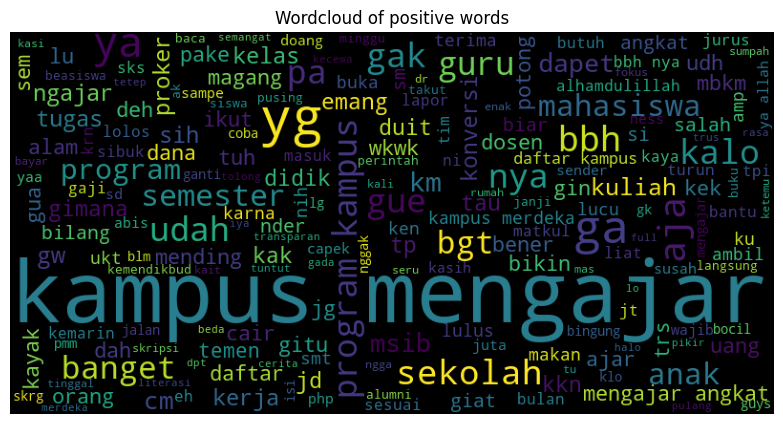

In [36]:
#Positive wordcloud
all_positive_words = ''
for text in positive_words:
    for words in text:
        all_positive_words += ' ' + words
        
wordcloud_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_positive_words)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wordcloud of positive words')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [18]:
sentiment = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ').apply(words_sentiment)
sentiment

0      ([lulus, merah, lulus, hitung, bugar, prima, l...
1      ([alhamdulillah, alhamdulillah, gratis, tabung...
2      ([pas, siswa, uji, nilai, transparan, ngasih, ...
3      ([banget, asli, dapet, sekolah, rumah, dana, s...
4      ([sekolah, dana, bos, dana, tolong], [bantu, p...
                             ...                        
833          ([], [kampus, tipu, bkn, kampus, mengajar])
834                      ([], [nanya, kampus, mengajar])
835    ([], [ga, expect, kampus, mengajar, life, rumit])
836    ([], [kampus, mengajar, gak, segutluking, tim,...
837                       ([], [kampus, mengajar, scam])
Name: Tokenized_FullText, Length: 838, dtype: object

In [19]:
zipped_sentiment2 = list(zip(*sentiment))

In [20]:
positive_words2 = zipped_sentiment2[0]
negative_words2 = zipped_sentiment2[1]


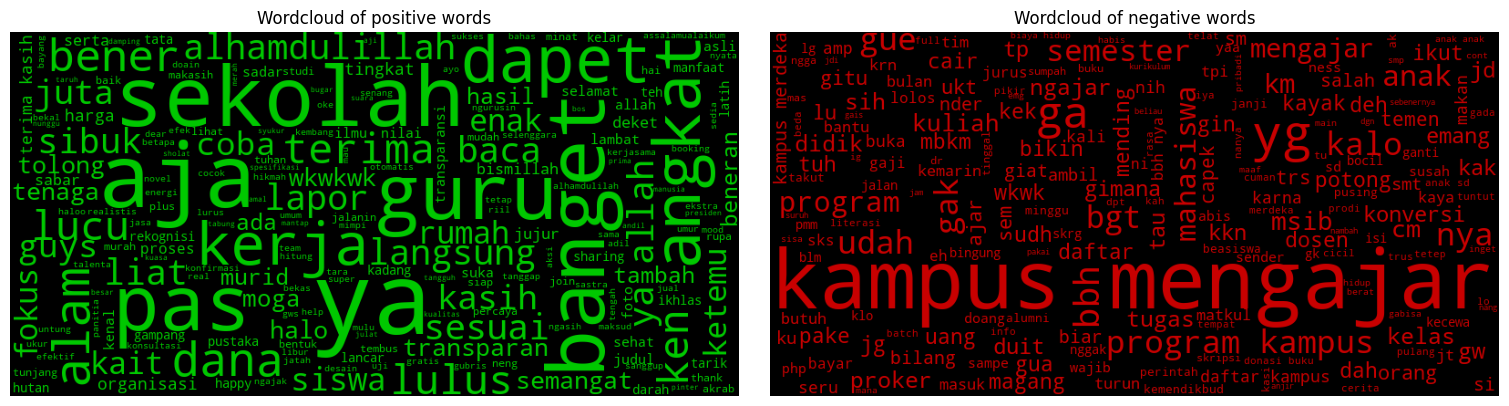

In [40]:
#Positive & Negative wordcloud
all_positive_words2 = ''
for text in positive_words2:
    for words in text:
        all_positive_words2 += ' ' + words
        
all_negative_words2 = ''
for text in negative_words2:
    for words in text:
        all_negative_words2 += ' ' + words

    
wordcloud_positive2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110, color_func=lambda *args, **kwargs: (0,200,0)).generate(all_positive_words2)

wordcloud_negative2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110, color_func=lambda *args, **kwargs: (200,0,0)).generate(all_negative_words2)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].set_title('Wordcloud of positive words')
ax[0].grid(False)
ax[0].imshow((wordcloud_positive2))
ax[0].axis('off')
fig.tight_layout(pad=0)
ax[1].set_title('Wordcloud of negative words')
ax[1].grid(False)
ax[1].imshow((wordcloud_negative2))
ax[1].axis('off')
plt.show()


In [91]:
#Modeling

X = dfnew['Tokenized_FullText'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ')
max_features = 5000

#Tokenizer
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_features, split= ' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(838, 45)

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Bidirectional

In [44]:
dfnew['Polarity']

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
833     Neutral
834    Negative
835    Negative
836    Negative
837     Neutral
Name: Polarity, Length: 838, dtype: object

In [23]:
polarity_hash = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
y = dfnew['Polarity'].map(polarity_hash)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(502, 45) (502,)
(336, 45) (336,)


In [26]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if(logs.get('accuracy')>0.75 and logs.get('val_accuracy')>0.75):
                self.model.stop_training = True

In [32]:

def create_model(embed_dim = 16, hidden = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    # model.add(Embedding(input_dim = max_features, output_dim = embed_dim))
    # model.add(LSTM(units = hidden*2, activation = 'relu', return_sequences=True))
    # model.add(Dropout(dropout_rate))
    # model.add(LSTM(units = hidden, activation = 'relu'))
    # model.add(Dropout(dropout_rate))
    # model.add(BatchNormalization())
    # model.add(Dense(units = 3, activation = 'softmax'))
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim))
    model.add(Bidirectional(LSTM(units = hidden*2, activation = 'relu', return_sequences=True)))
    model.add(Bidirectional(LSTM(units = hidden, activation = 'relu')))
    model.add(Dropout(dropout_rate))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate=learning_rate), metrics = ['accuracy'])
    # print(model.summary())
    return model

In [53]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Coding\\Python\\MariBelajar\\Capstone\\venv\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/4.9 MB ? eta -:--:--
      --------------------------------------- 0.1/4.9 MB 2.0 MB/s eta 0:00:03
     -- ------------------------------------- 0.3/4.9 MB 3.7 MB/s eta 0:00:02
     ----- ---------------------------------- 0.7/4.9 MB 5.5 MB/s eta 0:00:01
     --------- ------------------------------ 1.2/4.9 MB 7.0 MB/s eta 0:00:01
     -------------- ------------------------- 1.7/4.9 MB 7.9 MB/s eta 0:00:01
     ------------------ --------------------- 2.3/4.9 MB 8.6 MB/s eta 0:00:01
     ----------------------- ---------------- 2.8/4.9 MB 9.0 MB/s eta 0:00:01
     --------------------------- ------------ 3.4/4.9 MB 9.3 MB/s eta 0:00:01
     ------------------------------- -------- 3.9/4.9 MB 9.6 MB/s eta 0:00:01
     ------------------------------------ --- 4.5/4.9 MB 9.8 MB/s eta 0:00:01
     ---------------------------------------  4.9/4.9 MB 10.1 MB/s eta 0:00:01
     ---------------------------------------- 4.9/4.9 MB 9.5 MB/s eta

In [99]:
import torch
# Load model directly
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer2 = AutoTokenizer.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")
model = TFAutoModelForSequenceClassification.from_pretrained("ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [62]:
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 110619651 (421.98 MB)
Trainable params: 110619651 (421.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Manual Hypertuning Parameter
# embed_dim = [32, 64]
# hidden_unit = [16, 32, 64]
# dropout_rate = [0.2, 0.5]
# learning_rate = [0.001, 2e-05]
# epochs = [10, 25]
# batch_size = [16]
# optimizers = [Adam]

# tuning_df = pd.DataFrame(columns=['Embedding Dimension', 'Hidden Unit', 'Dropout Rate', 'Learning Rate', 'Epochs', 'Batch Size','Optimizers', 'Accuracy'])
# for embed in embed_dim:
#     for hidden in hidden_unit:
#         for dropout in dropout_rate:
#             for lr in learning_rate:
#                 for epoch in epochs:
#                     for batch in batch_size:
#                         for opt in optimizers:
#                             model = create_model(embed_dim=embed, hidden=hidden, dropout_rate=dropout, optimizers=opt, learning_rate=lr)
#                             history = model.fit(X_train, y_train, epochs = epoch, batch_size = batch, validation_data = (X_test, y_test), verbose = 1, callbacks=[myCallbacks()])
#                             accuracy = model.evaluate(X_test, y_test)[1]
#                             tuning_df.loc[len(tuning_df)] = {'Embedding Dimension': embed, 'Hidden Unit': hidden, 'Dropout Rate': dropout, 'Learning Rate': lr, 'Epochs': epoch, 'Batch Size': batch, 'Optimizers':opt, 'Accuracy': accuracy}
#                             print(f'Accuracy: {accuracy}')

In [78]:
#Predict
result = model.predict(X_test)
result


11/11 [==============================] - 7s 661ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[-3.0286956,  4.733133 , -1.2202203],
       [-2.9350512,  5.4882865, -2.163843 ],
       [-2.6171293,  5.3051224, -2.2319286],
       ...,
       [-4.0621543,  3.7206185,  1.0386571],
       [-3.0872016,  5.042836 , -1.5906739],
       [-2.646001 ,  4.1196814, -0.9901954]], dtype=float32), hidden_states=None, attentions=None)

In [80]:
result[0]

array([[-3.0286956,  4.733133 , -1.2202203],
       [-2.9350512,  5.4882865, -2.163843 ],
       [-2.6171293,  5.3051224, -2.2319286],
       ...,
       [-4.0621543,  3.7206185,  1.0386571],
       [-3.0872016,  5.042836 , -1.5906739],
       [-2.646001 ,  4.1196814, -0.9901954]], dtype=float32)

In [84]:
result_end = np.argmax(result[0], axis=1)
result_end

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [86]:
import matplotlib.pyplot as plt

In [89]:
#confusion matrix
y_pred = np.argmax(result[0], axis=1)
cm = confusion_matrix(y_test, y_pred)
cm


array([[  2, 146,   1],
       [  0, 132,   3],
       [  0,  51,   1]], dtype=int64)

In [94]:
y_test

210    1
824    0
78     1
67     1
679    0
      ..
836    0
178    1
552    1
766    2
177    1
Name: Polarity, Length: 336, dtype: int64

In [93]:
#turn back x_test to text
X_test_text = tokenizer.sequences_to_texts(X_test)

#Xtest with prediction
df_xtest = pd.DataFrame(X_test_text, columns=['Text'])
df_xtest['Polarity'] = y_test
df_xtest['Predicted Polarity'] = result_end
df_xtest

,Text,Polarity,Predicted Polarity
0,klo ken dapet uang segitu mah kampus mengajar ...,NaN,1
1,cm ikut kampus mengajar ga kalo tanyatanya,NaN,1
2,kalah karo jaman kampus mengajar yg didapetin ...,1.0,1
3,halo booking slot comms mei prefer yg ga deadl...,NaN,1
4,kalo kampus kampus merdeka smt program mbkm ca...,NaN,1
...,...,...,...
331,kampus mengajar gak segutluking tim km bocil b...,1.0,1
332,semester tepat program kampus mengajar kek kam...,0.0,1
333,mantaaap nih kelar kampus mengajar nonton kons...,0.0,1
334,kampus mengajar gitu mahasiswa nonpendidikan ga,0.0,1


In [100]:
#predict a text


ValueError: in user code:

    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 2436, in predict_function  *
        return step_function(self, iterator)
    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 2409, in run_step  *
        outputs = model.predict_step(data)
    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 2377, in predict_step  *
        return self(x, training=False)
    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 565, in error_handler  *
        del filtered_tb
    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 588, in __call__  *
        return super().__call__(*args, **kwargs)
    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 565, in error_handler  *
        del filtered_tb
    File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\base_layer.py", line 1136, in __call__  *
        outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_file8jr3ib15.py", line 165, in error_handler
        bound_signature = ag__.Undefined('bound_signature')
    File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_file8jr3ib15.py", line 165, in error_handler
        bound_signature = ag__.Undefined('bound_signature')
    File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_filedi5lusd1.py", line 40, in tf__run_call_with_unpacked_inputs
        raise
    File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_filequpg_78q.py", line 76, in tf__call
        batch_size, seq_length = ag__.ld(input_shape)

    ValueError: Exception encountered when calling layer 'tf_bert_for_sequence_classification_2' (type TFBertForSequenceClassification).
    
    in user code:
    
        File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\transformers\modeling_tf_utils.py", line 1735, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 1747, in call  *
            outputs = self.bert(
        File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\training.py", line 560, in error_handler  *
            filtered_tb = _process_traceback_frames(e.__traceback__)
        File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\tf_keras\src\engine\base_layer.py", line 1136, in __call__  *
            outputs = call_fn(inputs, *args, **kwargs)
        File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_file8jr3ib15.py", line 162, in error_handler  **
            raise ag__.converted_call(ag__.ld(new_e).with_traceback, (ag__.ld(e).__traceback__,), None, fscope_1) from None
        File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_file8jr3ib15.py", line 34, in error_handler
            retval__1 = ag__.converted_call(ag__.ld(fn), tuple(ag__.ld(args)), dict(**ag__.ld(kwargs)), fscope_1)
        File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_filedi5lusd1.py", line 37, in tf__run_call_with_unpacked_inputs  **
            retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
        File "C:\Users\Windows\AppData\Local\Temp\__autograph_generated_filequpg_78q.py", line 76, in tf__call  **
            batch_size, seq_length = ag__.ld(input_shape)
    
        ValueError: Exception encountered when calling layer 'bert' (type TFBertMainLayer).
        
        in user code:
        
            File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\transformers\modeling_tf_utils.py", line 1735, in run_call_with_unpacked_inputs  *
                return func(self, **unpacked_inputs)
            File "c:\Coding\Python\MariBelajar\Capstone\venv\Lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 874, in call  *
                batch_size, seq_length = input_shape
        
            ValueError: not enough values to unpack (expected 2, got 1)
        
        
        Call arguments received by layer 'bert' (type TFBertMainLayer):
          • input_ids=tf.Tensor(shape=(None,), dtype=int32)
          • attention_mask=None
          • token_type_ids=None
          • position_ids=None
          • head_mask=None
          • inputs_embeds=None
          • encoder_hidden_states=None
          • encoder_attention_mask=None
          • past_key_values=None
          • use_cache=None
          • output_attentions=False
          • output_hidden_states=False
          • return_dict=True
          • training=False
    
    
    Call arguments received by layer 'tf_bert_for_sequence_classification_2' (type TFBertForSequenceClassification):
      • input_ids=tf.Tensor(shape=(None,), dtype=int32)
      • attention_mask=None
      • token_type_ids=None
      • position_ids=None
      • head_mask=None
      • inputs_embeds=None
      • output_attentions=None
      • output_hidden_states=None
      • return_dict=None
      • labels=None
      • training=False


In [95]:
#to excel
df_xtest.to_excel('Xtest_with_prediction.xlsx', index=False)